# Redes neuronales artificiales

En el presente notebook, se van a entrenar dos redes neuronales para resolver un problema de clasificación y uno de regresión, en ambos casos los datasets empleados son de la librería *sklearn*.



In [1]:
# Librerías comunes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

# Modelo de clasificación

Se emplea el **dataset iris**, el cual se compone de 150 registros, en los que se representan 3 tipos de las flores iris. La información de cada variante se representa por las medidas del sépalo y petalo en cm:
  * longitud del sépalo
  * anchura del sépalo
  * longitud de los pétalos
  * anchura de los pétalos

Antes de entrenar la ANN, se realizará lo siguiente en el dataset:
 1. Distribución de clases (dataset balanceado)
 2. Análisis de las variables de entrada
 3. División del dataset
 3. Normalización

In [2]:
from sklearn.datasets import load_iris

In [3]:
X_whole, y_whole = load_iris(return_X_y=True, as_frame=True)

In [4]:
print(load_iris()["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Distribución de clases

Número de registros por clase


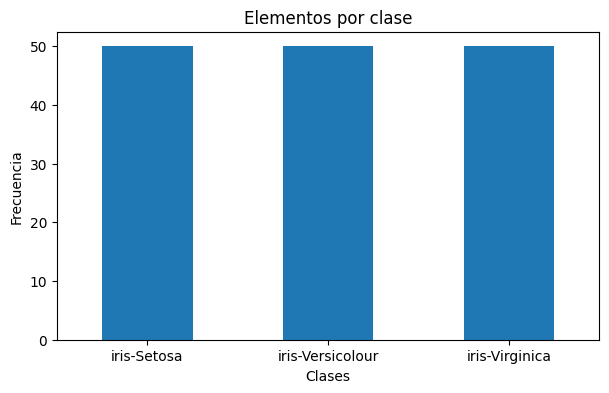

In [5]:
class_labels = ['iris-Setosa', 'iris-Versicolour', 'iris-Virginica']

print("Número de registros por clase")
ax = pd.Series(list(y_whole)).value_counts().plot(kind='bar',
                                    figsize=(7,4),
                                    title="Elementos por clase")
ax.set_xlabel("Clases")
ax.set_ylabel("Frecuencia")
ax.set_xticklabels(class_labels)
plt.xticks(rotation=0)
plt.show()

### Análisis de las variables de entrada

In [6]:
X_whole.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


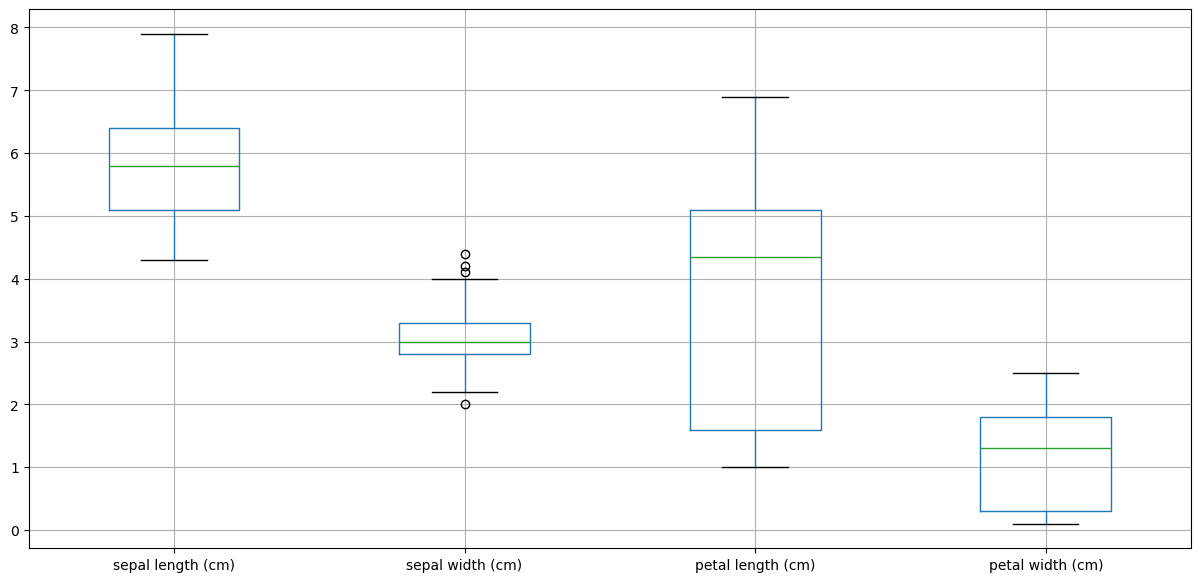

In [7]:
boxplot = X_whole.boxplot(figsize=(15,7))

plt.show()

### División del dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_whole, y_whole,
                                                    stratify=y_whole,
                                                    test_size=0.2)

### Normalización de datos

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = MinMaxScaler()
X_test = scaler_test.fit_transform(X_test)

### Entrenamiento de la red neuronal para clasificación


MLPClassifier es una red neuronal multicapa para un problema de clasificación. Sus parámetos son:

* **hidden_layer_sizes** El i-ésimo elemento representa el número de neuronas en la i-ésima capa oculta., por default es (100,)
* **activation** indica la función de activación de la capa oculta, la cual puede ser 'identity', 'logistic', 'tanh' o 'relu', por default es 'relu'.
  * *identity*
  $$
    f(x) = x
  $$
  * *logistic*
  $$
    f(x) = 1 / (1 + \exp(-x))
  $$
  * *tanh*
  $$
    f(x) = \tanh(x)
  $$
  * *relu*
  $$
  f(x) = \max(0, x)
  $$
* **solver** indica el método que se emplea en el entrenamiento para optimizar los pesos, puede ser 'lbfgs', 'sgd' o 'adam'}, por default es 'adam'.
  * *lbfgs* pertenece a la familia de métodos quasi-Newton.
  * *sgd* es el método del descenso de gradiente estocástico.
  * *adam* es un optimizador basado en gradiente estocástico.

* **alpha** es un número float que representa el término de regularización **L2**, por default vale 0.0001.

* **batch_size** es un valor entero que indica el tamaño de los *minibatchs*. No se emplea si el optimizador es **lbfgs**. Si se le asigna "*auto*" el valor es min(200, n_samples).

* **learning_rate** indica el learning rate que se usa para las actualizaciones de peso. Los valores que puede tomar son: 'constant', 'invscaling', o 'adaptive', por default es 'constant'.
  * *constant* learning rate constante especificado en '**learning_rate_init**'.
  * *invscaling* disminuye de manera gradual el valor de learning rate conforme avanzan el proceso de entrenamiento. La fórmula para la actualización es:
  $$
  \mbox{effective_learning_rate} = \mbox{learning_rate_init} / pow(t, power\_t)
  $$
  * *adaptive* mantiene el valor de learning rate constante '**learning_rate_init**' mientras la pérdida disminuye. En caso de que dos épocas consecutivas no disminuye la pérdida o aumenta el valor de validación en al menos **tol**, y si está activado **early_stopping**, entonces learning rate se divide por 5. Sólo se emplea con el optimizador **sgd**

* **learning_rate_init** es el learning rate inicial y es un valor float, por default es 0.001. Sólo se emplea con los optimizadores '*sgd*' o '*adam*'.

* **max_iter** es un valor entero que indica el número máximo de iteraciones (épocas), por default es 200.

* **tol** es un valor float que representa la tolerancia en el proceso de optimización, por default es 1e-4. En caso de que la pérdida o puntuación no mejore en al menos **n_iter_no_change** iteraciones consecutivas, se termina el entrenamiento. No aplica con **learning_rate** *adaptive*.

REFERENCIA: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier



In [10]:

from sklearn.neural_network import MLPClassifier

# red neuronal con 2 capas ocultas con 5 y 2 neuronas
iris_ANN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 4, 3), random_state=1)

# Para entrenar una MLP se requiere el conjunto de datos de entrenamiento (X, y)
iris_ANN.fit(X_train, y_train)

# Inferencias para X_test
y_pred = iris_ANN.predict(X_test)

### Métricas del modelo de clasificación

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



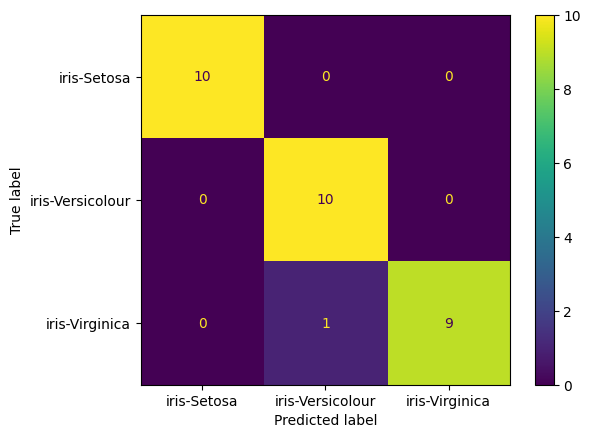

In [12]:
y_labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=y_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot();

## Modelo de regresión

Se emplea el dataset **diabetes**, el cual se compone de 442 registros que tienen 10 atributos:
  * age - edad
  * sex - sexo
  * bmi - índice de masa corporal
  * bp - presión arterial media
  * s1 tc - colesterol sérico
  * s2 ldl - lipoproteínas de baja densidad
  * s3 hdl - lipoproteínas de alta densidad
  * s4 tch - colesterol total
  * s5 ltg - posiblemente logaritmo del nivel sérico de triglicéridos
  * s6 glu - nivel de azúcar en la sangre

La variable de salida es **target**

Antes de entrenar la ANN para regresión, se realizará lo siguiente en el dataset:

1. Verificar si existen nulos en el dataset
2. Análisis de las variables de entrada
3. Correlación de las variables
4. División del dataset


In [13]:
from sklearn.datasets import load_diabetes
X_wholed, y_wholed = load_diabetes(return_X_y=True, as_frame=True)

In [14]:
X_wholed.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
318,0.088931,-0.044642,0.006728,0.025315,0.030078,0.008707,0.063367,-0.039493,0.009434,0.032059
335,0.005383,-0.044642,-0.048241,-0.012556,0.001183,-0.006637,0.063367,-0.039493,-0.051404,-0.059067
291,0.074401,-0.044642,0.018584,0.063187,0.061725,0.042840,0.008142,-0.002592,0.058038,-0.059067
418,0.009016,-0.044642,-0.024529,-0.026328,0.098876,0.094196,0.070730,-0.002592,-0.021395,0.007207
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
131,-0.096328,-0.044642,-0.069797,-0.067642,-0.019456,-0.010708,0.015505,-0.039493,-0.046883,-0.079778
182,0.045341,0.050680,0.005650,0.056301,0.064477,0.089186,-0.039719,0.071210,0.015568,-0.009362
365,0.034443,-0.044642,-0.038540,-0.012556,0.009439,0.005262,-0.006584,-0.002592,0.031193,0.098333
43,0.019913,-0.044642,-0.023451,-0.071085,0.020446,-0.010082,0.118591,-0.076395,-0.042571,0.073480
23,0.045341,0.050680,0.060618,0.031065,0.028702,-0.047347,-0.054446,0.071210,0.133597,0.135612


### Verificar si existen nulos

In [15]:
X_wholed.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


### Análisis de las variables de entrada

In [16]:
X_wholed.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


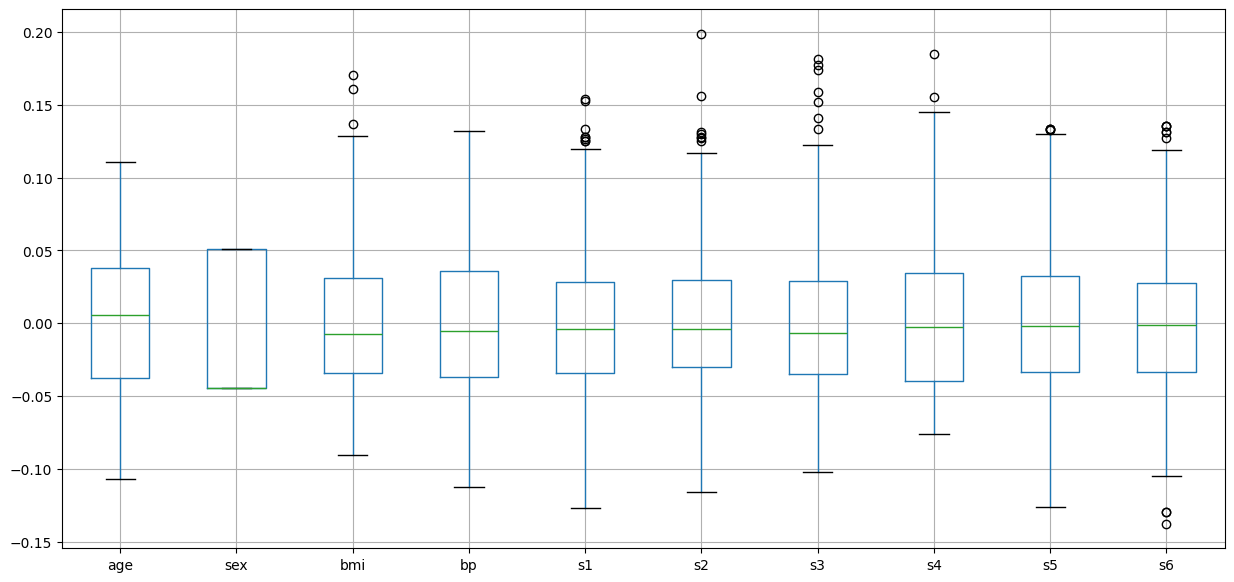

In [17]:
boxplot = X_wholed.boxplot(figsize=(15,7))
plt.show()

In [18]:
df_whole = pd.concat([X_wholed, y_wholed], axis=1)
df_whole.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
365,0.034443,-0.044642,-0.038540,-0.012556,0.009439,0.005262,-0.006584,-0.002592,0.031193,0.098333,206.0
316,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074966,0.040343,220.0
197,0.048974,0.050680,0.003494,0.070072,-0.008449,0.013404,-0.054446,0.034309,0.013317,0.036201,129.0
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066051,0.131470,310.0
20,-0.049105,-0.044642,-0.056863,-0.043542,-0.045599,-0.043276,0.000779,-0.039493,-0.011897,0.015491,68.0
258,0.078034,0.050680,-0.024529,-0.042406,0.006687,0.052861,-0.069172,0.080804,-0.037129,0.056912,89.0
149,-0.049105,0.050680,-0.005128,-0.046985,-0.020832,-0.020416,-0.069172,0.071210,0.061238,-0.038357,126.0
134,-0.074533,-0.044642,0.043373,-0.033213,0.012191,0.000252,0.063367,-0.039493,-0.027129,-0.046641,103.0
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078,148.0
78,0.005383,-0.044642,-0.057941,-0.022885,-0.067615,-0.068328,-0.054446,-0.002592,0.042897,-0.083920,252.0


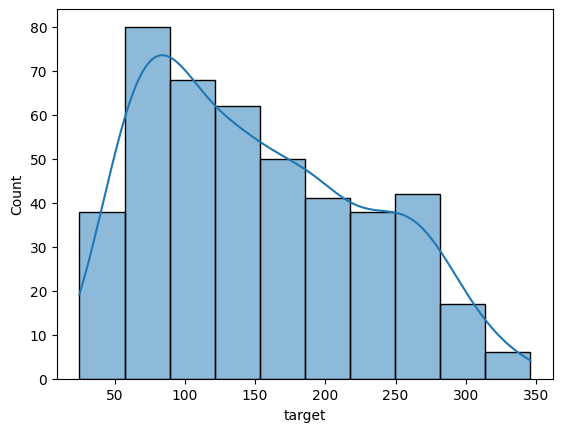

In [19]:
lst_y = ['target']

# Se grafica la variable target mediante un histograma
sb.histplot(y_wholed, kde=True)
plt.show()

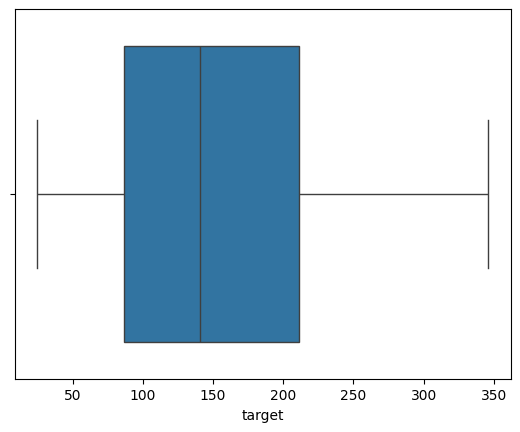

In [20]:
# Se grafica la variable target mediante un diagrama de caja
sb.boxplot(y_wholed, orient='h')
plt.show()

### Correlación de las variables X con y

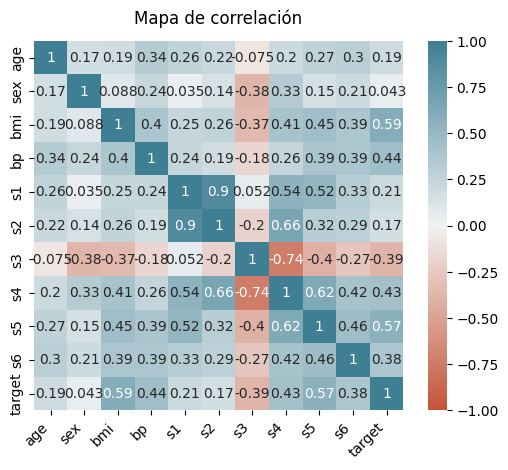

In [21]:
corr= df_whole.corr()
ax = sb.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('Mapa de correlación', fontdict={'fontsize':12}, pad=12);

### División del dataset

In [22]:
X_traind, X_testd, y_traind, y_testd = train_test_split(X_wholed, y_wholed, test_size=0.2, random_state=1)

### Entrenamiento de una red neuronal para un problema de regresión

In [23]:
from sklearn.neural_network import MLPRegressor

diab_ANN = MLPRegressor(solver='sgd', random_state=1)
diab_ANN.fit(X_traind, y_traind)

MLPRegressor(random_state=1, solver='sgd')

In [24]:
diab_ANN.score(X_testd, y_testd)

0.42861137789900217

### Métricas del modelo de regresión

In [25]:
y_predd = diab_ANN.predict(X_testd)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute metrics
mse = mean_squared_error(y_testd, y_predd)
print("MSE:", mse)
print("MAE:", mean_absolute_error(y_testd, y_predd))
print("RMSE:", np.sqrt(mse))
r2 = r2_score(y_testd, y_predd)
print("R^2", r2)

MSE: 3044.913015235024
MAE: 42.19115638376611
RMSE: 55.18073047029211
R^2 0.42861137789900217
